# День 02 – Машинное обучение

В начале импортируй библиотеки, которые понадобяться нам в работе.

In [1]:
import pandas as pd
import numpy as np

import shap
import sklearn
import catboost

import seaborn as sns
import matplotlib.pyplot as plt;

Если ячейка выше у нас **не запускается**, то скорее всего у нас **не установлена какая-либо библиотека**.  **Чтобы установить библиотеку напиши**:
`pip install scikit-learn` или `pip install catboost` или `pip install shap` 

In [2]:
sns.set_style("darkgrid") #у графиков будет красивая серая подложка

Нашу задачу по предсказанию стоимости недвижимости мы будет решать по примеру решении задачи прогнозирования прогресса диабета по данным индекса массы тела. Давай загрузим наши данные по обеим задачам.

## Загрузка данных

In [3]:
train = pd.read_csv("../data/day02/dataset_01_06.csv")
train = train.set_index("client_id")
train = train.drop_duplicates()

In [4]:
train

,house_class_key_1m,crm_ota_count_d2m,deff_p1m,data_shpd_d3m,crm_prt_count_p2m,crm_sal_count_d1m,prepay_sum_d3m,correction_rev_sum_p2m,cnt_hflat_1m,crm_iptv_count_1m,...,avg_view_category_16_p1m,avg_view_tvmarket_d1m,avg_view_adult_p1m,avg_view_genre_news_p3m,avg_view_category_6_p2m,avg_view_inform_d1m,avg_view_adult_d1m,avg_view_genre_news_d1m,avg_view_genre_music_p1m,avg_view_category_6_3m
client_id,,,,,,,,,,,,,,,,,,,,,
129646,818788754.0,0.0,0.0,0.186979,0.0,0.0,0.0,0.0,1,0.0,...,NaN,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN
155393,818788755.0,0.0,0.0,-0.668074,0.0,0.0,0.0,0.0,1,0.0,...,0.02,0.0,0.0,9.41,0.0,-0.265625,0.0,-0.594155,1.73,0.0
161396,818788754.0,0.0,0.0,-0.507485,0.0,0.0,0.0,0.0,1,0.0,...,NaN,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN
63895,818788753.0,0.0,0.0,1.125792,0.0,0.0,0.0,0.0,1,0.0,...,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.00,0.0
108614,818788753.0,0.0,0.0,-0.444579,0.0,0.0,0.0,0.0,1,0.0,...,NaN,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192198,NaN,0.0,0.0,0.363919,0.0,0.0,0.0,0.0,1,0.0,...,NaN,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN
32502,818788755.0,-1.0,0.0,-0.213947,0.0,0.0,0.0,0.0,1,0.0,...,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.00,0.0
69897,818788754.0,0.0,0.0,0.117901,0.0,0.0,0.0,0.0,1,0.0,...,NaN,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN


In [5]:
train.head(5) # Смотрим первые 5 строк в таблице

,house_class_key_1m,crm_ota_count_d2m,deff_p1m,data_shpd_d3m,crm_prt_count_p2m,crm_sal_count_d1m,prepay_sum_d3m,correction_rev_sum_p2m,cnt_hflat_1m,crm_iptv_count_1m,...,avg_view_category_16_p1m,avg_view_tvmarket_d1m,avg_view_adult_p1m,avg_view_genre_news_p3m,avg_view_category_6_p2m,avg_view_inform_d1m,avg_view_adult_d1m,avg_view_genre_news_d1m,avg_view_genre_music_p1m,avg_view_category_6_3m
client_id,,,,,,,,,,,,,,,,,,,,,
129646,818788754.0,0.0,0.0,0.186979,0.0,0.0,0.0,0.0,1,0.0,...,NaN,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN
155393,818788755.0,0.0,0.0,-0.668074,0.0,0.0,0.0,0.0,1,0.0,...,0.02,0.0,0.0,9.41,0.0,-0.265625,0.0,-0.594155,1.73,0.0
161396,818788754.0,0.0,0.0,-0.507485,0.0,0.0,0.0,0.0,1,0.0,...,NaN,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN
63895,818788753.0,0.0,0.0,1.125792,0.0,0.0,0.0,0.0,1,0.0,...,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.00,0.0
108614,818788753.0,0.0,0.0,-0.444579,0.0,0.0,0.0,0.0,1,0.0,...,NaN,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN


In [6]:
from sklearn.datasets import load_diabetes

In [7]:
# Загружаем датасет по задаче прогнозирования индекса диабета
data = load_diabetes(scaled=False)
diabetes_df = pd.DataFrame(data.data, columns=data.feature_names)
diabetes_df.insert(10, 'disease_progress', data.target)

In [8]:
diabetes_df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progress
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


Давайте посмотрим, какую зависимость имеет прогрессирование болезни от индекса массы тела. Для этого выведем значения на график.

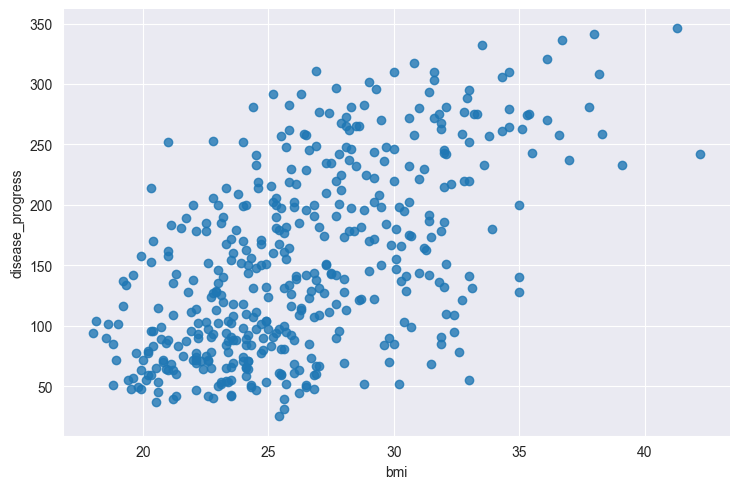

In [9]:
sns.lmplot(
    x="bmi", y="disease_progress", data=diabetes_df, fit_reg=False,
height=5, aspect=1.5);

В глаза бросается, что с ростом индекса массы тела растет и прогрессирование болезни. Неудивительно!
Было бы здорово найти прямую, которая бы наилучшим образом отражала, как быстро растет риск с ростом индекса массы тела.

## Удаление колонок

С помощью метода `.shape`. Можно вывести размерность датасета

In [10]:
diabetes_df.shape # Таблица содержит 442 строки и 11 колонок

(442, 11)

Для простоты примера возьмем как признак только значение индекса массы и пол. Удалим из датасета названия колонок, котоыре нам не требуется `['age', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']`.
Для этого воспользуемся методом `.drop()`

In [11]:
diabetes_df = diabetes_df.drop(columns=['age', 'bp', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [12]:
diabetes_df.head(2)

,sex,bmi,disease_progress
0,2.0,32.1,151.0
1,1.0,21.6,75.0


In [13]:
diabetes_df.shape # Таблица содержит 442 строки и 3 колонки

(442, 3)

## Задание 1

В наших данных о клиентах есть признаками, которое могут быть *утечками данных*. Утечка данных может привести к 
созданию чрезмерно оптимистичных, а то и вовсе не действительных прогностических моделей. Утечка данных - это когда 
для создания модели используется информация, которая не будет доступна на этапе эксплуатации модели. Это признаки с 
приставками `charg_inst`, `charg_sale`, `hgid`, `hflat`, `hlid`. Также требуется удалить данные о координатах 
`latitude_1m` и `longitude_1m`

Удали признаки с этими приставками и сохрани результат 
в переменную `df`. Выведи размерность получившейся таблицы

In [14]:
lick = [x for x in train.columns if x.startswith('charg_inst') or x.startswith('charg_sale')]

In [15]:
lick.extend([_ for _ in train.columns if _.startswith('hgid') or _.startswith('hflat') or _.startswith('hlid')])
lick.extend(['latitude_1m', 'longitude_1m'])

In [16]:
train = train.drop(columns=lick)

In [17]:
train.shape

(16046, 3587)

## Разделение на X и Y

Теперь разберемся, что в каждой из задач для нас будет являться признаком (Х), а что предсказываемой переменной (Y)

Для задачи предсказания уровня диабета колонка `disease_progress` будет являться Y, а значения `bmi` признаком

In [18]:
X_diabet = diabetes_df[['bmi']]
Y_diabet = diabetes_df['disease_progress']

## Задание 2

Раздели датасет `df` на признаки и предсказываемую величину. Признаки сохрани в переменную `X`, предсказываемую величину в переменную `Y`. Выведи размерность X и Y

In [19]:
Y = train['label']
X = train.drop(columns=['label'])

In [20]:
Y.shape

(16046,)

In [21]:
X.shape

(16046, 3586)

In [22]:
# 

## Задание 3

Теперь нам потребуется разделить наши признаки на численные и категориальные. В этом нам поможет функция метод [.select_dtypes()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html). Численные переменные имеют тип `'number'`, а категориальные `'object'`.
Численные переменные сохрани в переменную X_num, категориальные в переменную X_cat.

Выведи размерность этих таблиц.

In [23]:
X_cat = X.select_dtypes('object')

In [24]:
X_num = X.select_dtypes('number')

In [25]:
X_cat.shape

(16046, 8)

In [26]:
X_num.shape

(16046, 3578)

## Задание 4

Некоторые алгоритмы машинного обучения чувствительны к пропускам данных, поэтому нам придется заполнить отсутствующие 
данные чем то заполнить. Воспользуйся методом [.fillna(0)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
для того, чтобы заполнить пропуски в численных признаках.

Затем выполни этот код `X_num.isna().sum().sum()`

In [27]:
X_num = X_num.fillna(0)

In [28]:
X_num.isna().sum().sum()

0

## Стандартизация данных

Давайте вспомним, что одно из преобразований для численных переменных - стандартизация.

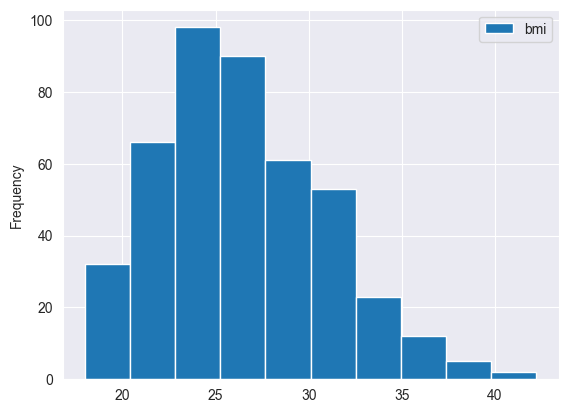

In [29]:
X_diabet.plot.hist();

Давайте проведем стандартизацию для переменной `bmi`. Для этого воспользуемся объектом `StandardScaler`

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_diabet = pd.DataFrame(scaler.fit_transform(X_diabet))

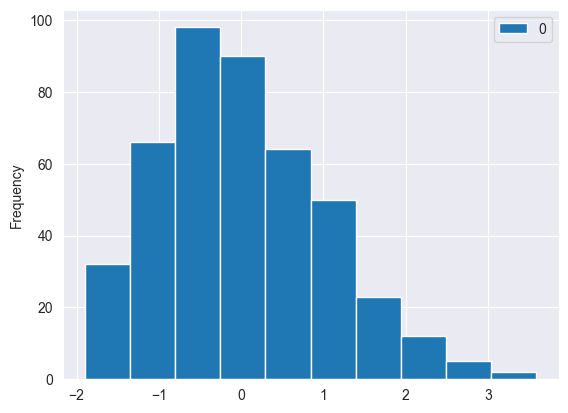

In [32]:
X_diabet.plot.hist(); 

## Задание 5

Проведи **стандартизацию** для численных переменных.

Затем выполни этот код `X_num.mean().sum().round()`

In [33]:
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns, index=X_num.index)

In [34]:
X_num.mean().sum().round()

-0.0

## Задание 6

Сделай **One-Hot Encoding** для категориальных признаков. В этом тебе поможешь функция [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Выведи размерность получившейся таблицы

In [35]:
X_cat = pd.get_dummies(X_cat)

In [36]:
X_cat.shape

(16046, 14520)

## Задание 7

Теперь уже преобразованные части требуется снова объединить в единый датасет. Соедини переменные `X_num` и `X_cat` в переменную `X`. Воспользуйся методом [.merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).
Объединение проведи по индексам таблицы.

Выведи размерность получившейся таблицы

In [37]:
X = X_cat.merge(X_num, left_index=True, right_index=True)

In [38]:
X_num.shape

(16046, 3578)

In [39]:
X_cat.shape

(16046, 14520)

In [40]:
X.shape

(16046, 18098)

## Разделение на Train, Test части

Для корректной оценки работы модели нам требуется разделить выборку на train и test части.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train_diabet, X_test_diabet, y_train_diabet, y_test_diabet = train_test_split(
    X_diabet, Y_diabet, test_size=0.2, random_state=21
)

In [43]:
X_train_diabet.shape

(353, 1)

In [44]:
X_test_diabet.shape

(89, 1)

## Задание 8

Раздели итоговый датасет по недвижимости на train и test части. Разделение проведи с параметрами `test_size=0.2`, `random_state=21`.

Выведи размерности переменных `X_train` и `X_test`

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [46]:
X_train.shape

(12836, 18098)

In [47]:
X_test.shape

(3210, 18098)

## Задание 9

Обучи модель `LogisticRegression`. Расчитай метрики `accuracy_score` и `roc_auc_score`. 

Выведи значений этой метрики.

In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [49]:
clf = LogisticRegression().fit(X_train, y_train); #обучим модель

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [50]:
pred = clf.predict(X_test)

In [51]:
accuracy_score(pred, y_test)

0.9461059190031152

In [52]:
pred = clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.545566083878402

## Задание 10

Теперь попробуй использовать алгоритм градиентного бустинга. Для этого воспользуйся алгоритмом `CatBoostRegressor` из библиотеки `catboost`. Также рассчитай значение метрики RMSLE.

P.S при обучение модели `CatBoostRegressor.fit()` используй параметр `verbose=100`

In [53]:
from catboost import CatBoostClassifier

In [54]:
boosting = CatBoostClassifier(iterations=2000, eval_metric='AUC', train_dir="base").fit(
    X_train, 
    y_train, 
    verbose=100,
    eval_set=(X_test, y_test),
)

Learning rate set to 0.044029
0:	test: 0.5045153	best: 0.5045153 (0)	total: 104ms	remaining: 3m 28s
100:	test: 0.6362879	best: 0.6362907 (99)	total: 4.38s	remaining: 1m 22s
200:	test: 0.6397117	best: 0.6443016 (181)	total: 8.38s	remaining: 1m 14s
300:	test: 0.6366679	best: 0.6443016 (181)	total: 12.3s	remaining: 1m 9s
400:	test: 0.6335867	best: 0.6443016 (181)	total: 16.2s	remaining: 1m 4s
500:	test: 0.6353580	best: 0.6443016 (181)	total: 20.3s	remaining: 1m
600:	test: 0.6368502	best: 0.6443016 (181)	total: 24.4s	remaining: 56.8s
700:	test: 0.6365546	best: 0.6443016 (181)	total: 28.5s	remaining: 52.7s
800:	test: 0.6352143	best: 0.6443016 (181)	total: 32.8s	remaining: 49.2s
900:	test: 0.6345069	best: 0.6443016 (181)	total: 36.8s	remaining: 44.9s
1000:	test: 0.6344793	best: 0.6443016 (181)	total: 40.6s	remaining: 40.5s
1100:	test: 0.6342168	best: 0.6443016 (181)	total: 44.5s	remaining: 36.4s
1200:	test: 0.6333712	best: 0.6443016 (181)	total: 48.5s	remaining: 32.2s
1300:	test: 0.6361787	b

In [55]:
from catboost import MetricVisualizer

In [56]:
MetricVisualizer(["base"]).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [57]:
metrics = boosting.eval_metrics(
    data=catboost.Pool(data=X_test, label=y_test),
    metrics=["AUC"],
)

In [58]:
pred = boosting.predict_proba(X_test)[:,1]

In [59]:
roc_auc_score(y_test, pred)

0.6443015798010948

## Задание 11

In [60]:
def plot_feature_importance(model, x_test, top=20): # model - наша модель, x_test - тестовые признаки, top - топ важных
    explainer = shap.Explainer(model)
    shap_values = explainer(x_test)
    shap_importance = shap_values.abs.mean(0).values
    sorted_idx = shap_importance.argsort()[-top:]
    fig = plt.figure(figsize=(12, 6))
    plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
    plt.title('SHAP Importance')

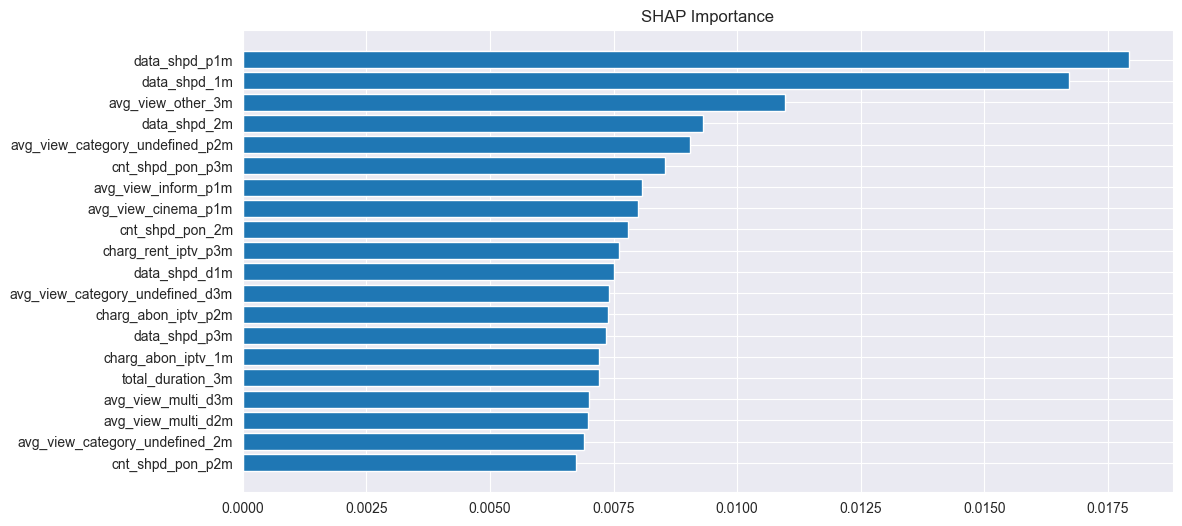

In [61]:
plot_feature_importance(boosting, X_test, top=20)